In [12]:
import generaluse as gu
from imgproc import getImgAnalysis
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Visualización de imágenes

In [31]:
folder_name = 'preprodata'

dictionary = gu.getImgNamesAndPaths(folder_name)

list_filenames = list(dictionary.keys())
list_filepaths = [*dictionary.values()]

list_data = []
for name, path in zip(list_filenames,list_filepaths):
    data = dict()
    data["Filename"] = name
    data["Filepath"] = path
    list_data.append(data)

dataframe = pd.DataFrame(data=list_data)
dataframe

Filename                   Filepath
0  pp-frb-001.jpg  preprodata/pp-frb-001.jpg
1  pp-frb-002.jpg  preprodata/pp-frb-002.jpg
2  pp-frb-003.jpg  preprodata/pp-frb-003.jpg
3  pp-frb-004.jpg  preprodata/pp-frb-004.jpg
4  pp-frb-005.jpg  preprodata/pp-frb-005.jpg

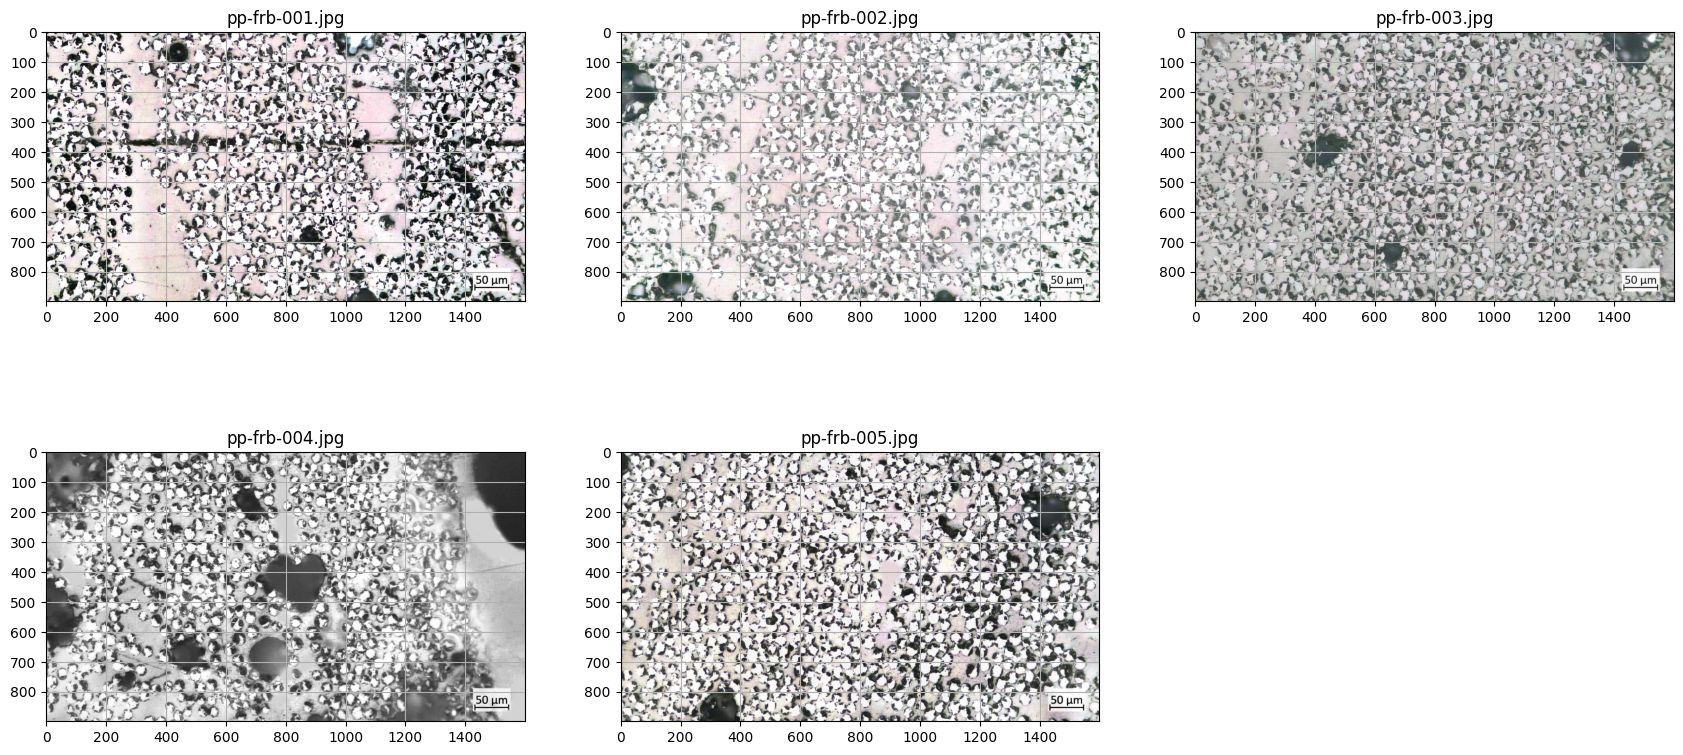

In [32]:
list_imgs = gu.getImagesFromPathfile(list_filepaths)
gu.plotFigures(list_filenames,list_imgs)

In [33]:
list_bubbles_coordinates = [
    [(80,420),(660,860),(880,1080)],
    [(200,80),(810,200),(200,950),(880,1080)],
    [(400,410),(750,650),(400,1450),(50,1480)],
    [(50,100),(550,70),(770,260),(680,480),(200,700),(400,800),(700,720),(870,1270),(100,1520)],
    [(50,10),(870,300),(200,1420)]
]

dataframe["BubbleCoor"] = list_bubbles_coordinates
dataframe

Filename                   Filepath  \
0  pp-frb-001.jpg  preprodata/pp-frb-001.jpg   
1  pp-frb-002.jpg  preprodata/pp-frb-002.jpg   
2  pp-frb-003.jpg  preprodata/pp-frb-003.jpg   
3  pp-frb-004.jpg  preprodata/pp-frb-004.jpg   
4  pp-frb-005.jpg  preprodata/pp-frb-005.jpg   

                                          BubbleCoor  
0               [(80, 420), (660, 860), (880, 1080)]  
1   [(200, 80), (810, 200), (200, 950), (880, 1080)]  
2  [(400, 410), (750, 650), (400, 1450), (50, 1480)]  
3  [(50, 100), (550, 70), (770, 260), (680, 480),...  
4                [(50, 10), (870, 300), (200, 1420)]

## Visualización de histogramas de cada elemento

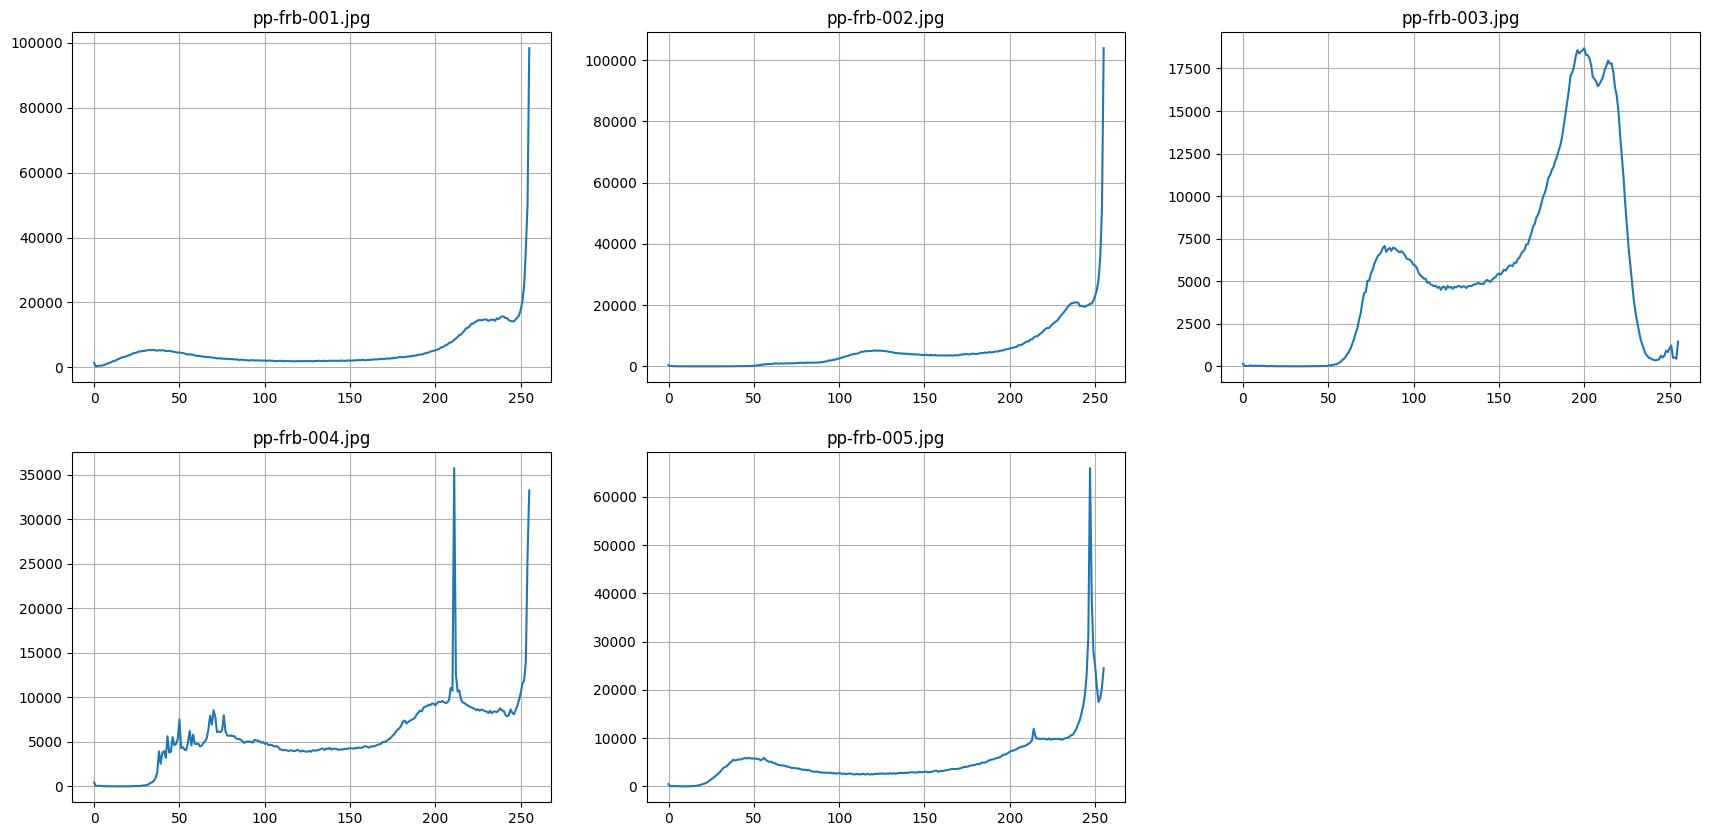

In [34]:
list_hist = []
for img in list_imgs:
    # Utilizo la capa verde porque es la que ofrece más gama de grises
    img_gch = img[:,:,1]
    
    hist = cv2.calcHist([img_gch], [0], None, [256], [0, 256])
    list_hist.append(hist)

gu.plotHist(list_filenames,list_hist)


In [44]:
list_graylevel_boundaries = [
    [120,250],
    [150,250],
    [120,210],
    [120,240],
    [100,245]
]

dataframe["GLBoundaries"] = list_graylevel_boundaries

dataframe

Filename                   Filepath  \
0  pp-frb-001.jpg  preprodata/pp-frb-001.jpg   
1  pp-frb-002.jpg  preprodata/pp-frb-002.jpg   
2  pp-frb-003.jpg  preprodata/pp-frb-003.jpg   
3  pp-frb-004.jpg  preprodata/pp-frb-004.jpg   
4  pp-frb-005.jpg  preprodata/pp-frb-005.jpg   

                                          BubbleCoor GLBoundaries  
0               [(80, 420), (660, 860), (880, 1080)]   [120, 250]  
1   [(200, 80), (810, 200), (200, 950), (880, 1080)]   [150, 250]  
2  [(400, 410), (750, 650), (400, 1450), (50, 1480)]   [120, 210]  
3  [(50, 100), (550, 70), (770, 260), (680, 480),...   [120, 240]  
4                [(50, 10), (870, 300), (200, 1420)]   [100, 245]

In [45]:
def plotResults(img_base,img_name,segmentation,results):

    proportions = [*results.values()]

    fig = plt.figure(figsize=(10,10))

    ax = fig.add_subplot(2, 1, 1)
    plt.imshow(img_base)
    plt.title(f"Original - {img_name}")
    plt.axis("off")

    ax = fig.add_subplot(2, 1, 2)
    plt.imshow(segmentation,cmap="viridis")
    plt.title(f"Fnd: {proportions[0]:.2f} % - Fde: {proportions[1]:.2f} % - Bur: {proportions[2]:.2f} % - Res: {proportions[3]:.2f} %")
    plt.axis("off")

    # Agregar la barra de color con etiquetas personalizadas
    cbar = plt.colorbar(orientation="vertical",shrink=0.5)
    cbar.set_ticks([30,70,150,250])
    cbar.set_ticklabels(["Burbujas", "Fibra degradada", "Resina", "Fibra no degradada"])

    plt.show()

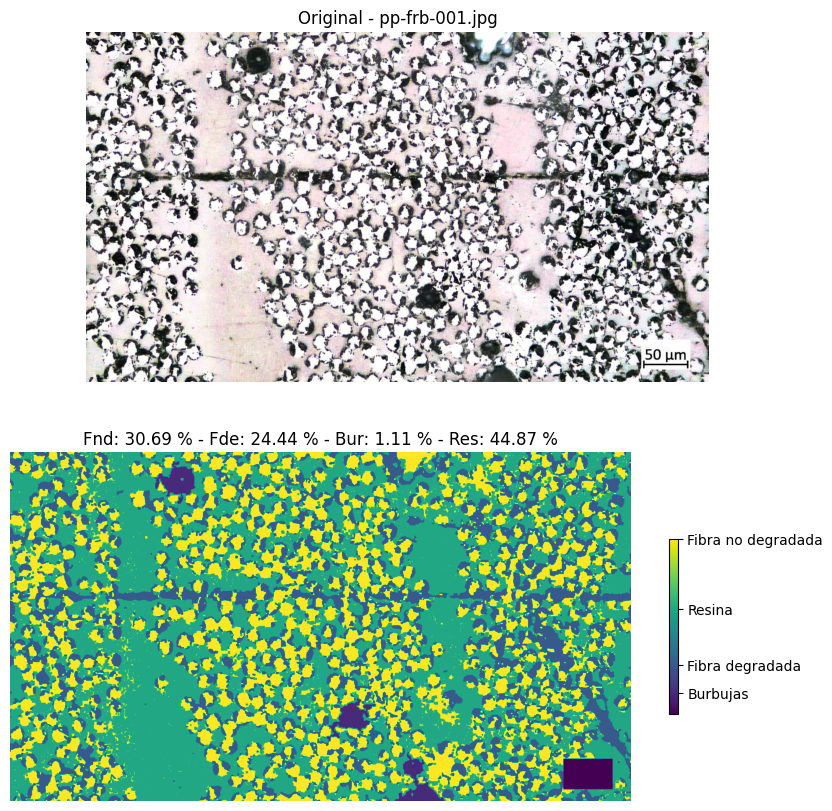

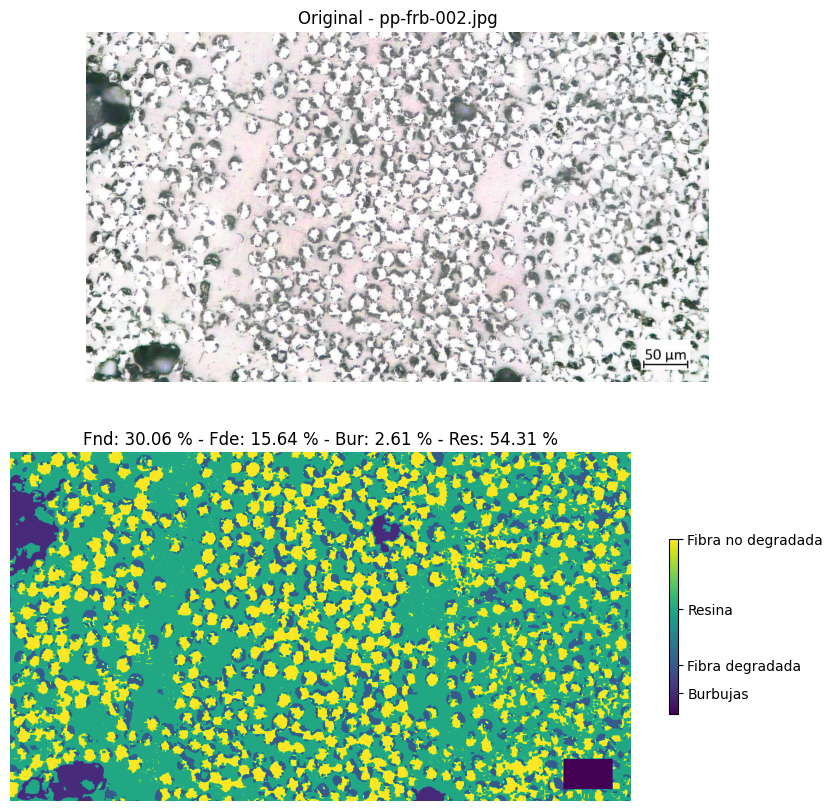

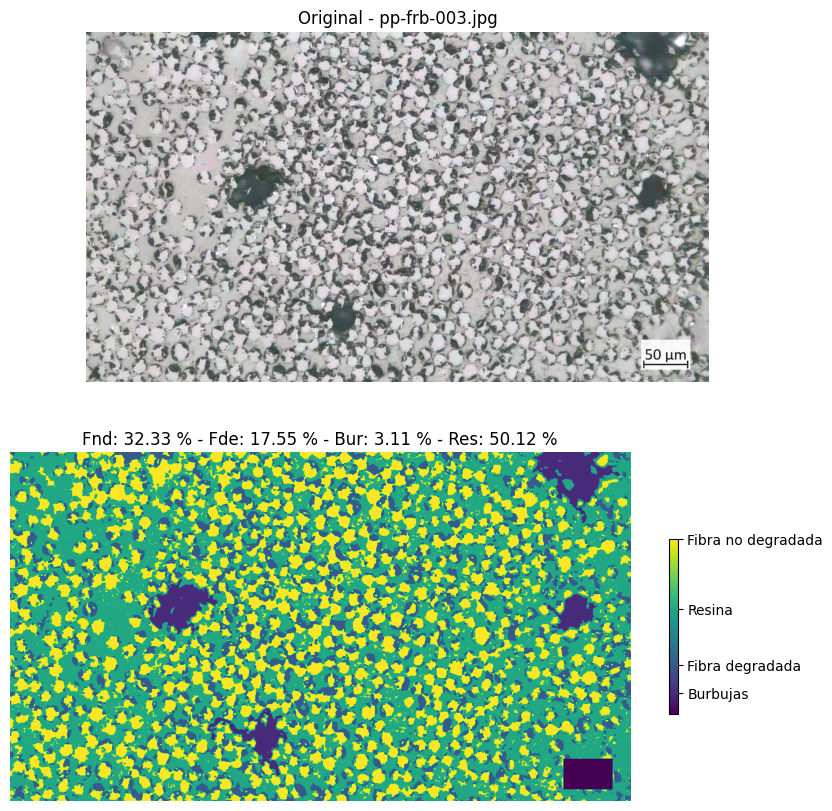

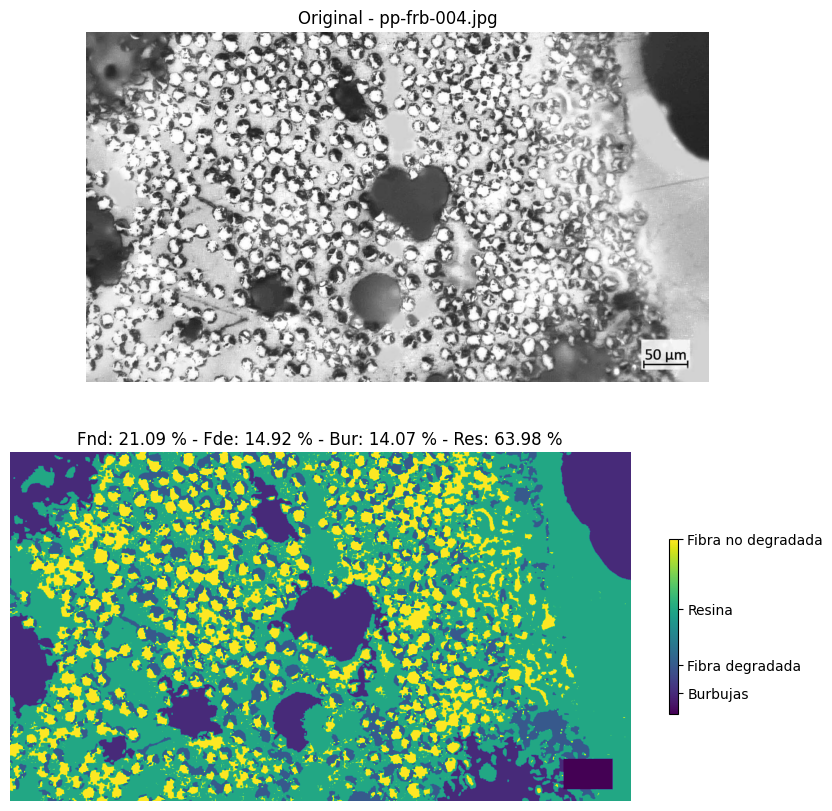

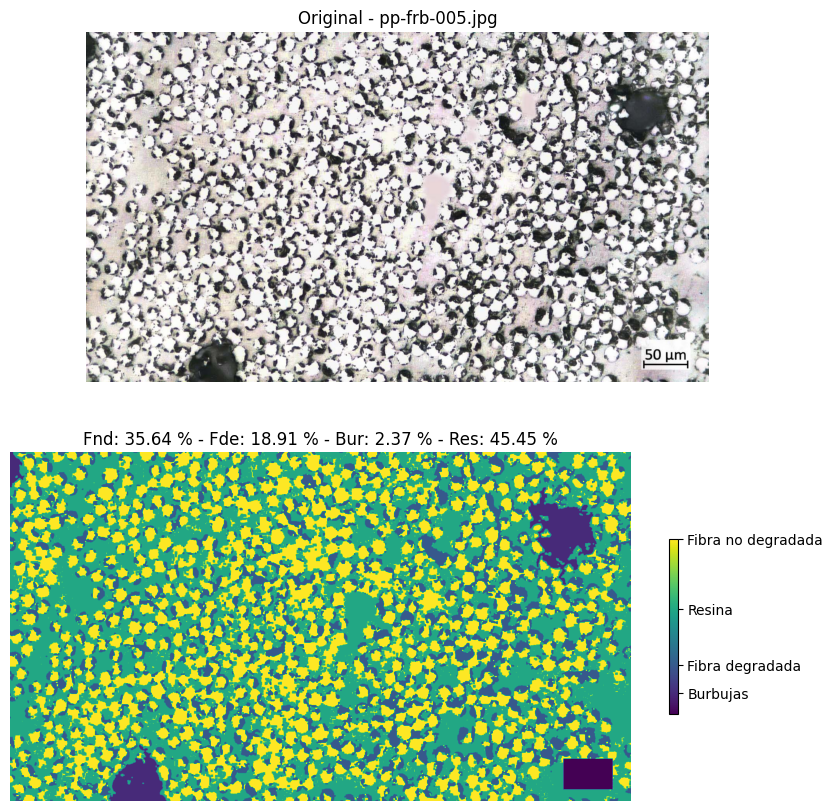

In [46]:
list_results = []

for base_img, img_name, gl_boundaries, bubble_coords in zip(list_imgs,
                                                            list_filenames,
                                                            list_graylevel_boundaries,
                                                            list_bubbles_coordinates):
    
    results, segmentation, _ = getImgAnalysis(base_img,
                                              gl_boundaries,
                                              bubble_coords)
    
    list_results.append(results)

    plotResults(base_img,img_name,segmentation,results)

In [50]:
dataframe_results = pd.concat([dataframe, pd.DataFrame(list_results)], axis=1).reindex(dataframe.index)
dataframe_results

Filename                   Filepath  \
0  pp-frb-001.jpg  preprodata/pp-frb-001.jpg   
1  pp-frb-002.jpg  preprodata/pp-frb-002.jpg   
2  pp-frb-003.jpg  preprodata/pp-frb-003.jpg   
3  pp-frb-004.jpg  preprodata/pp-frb-004.jpg   
4  pp-frb-005.jpg  preprodata/pp-frb-005.jpg   

                                          BubbleCoor GLBoundaries        Fnd  \
0               [(80, 420), (660, 860), (880, 1080)]   [120, 250]  30.686923   
1   [(200, 80), (810, 200), (200, 950), (880, 1080)]   [150, 250]  30.057977   
2  [(400, 410), (750, 650), (400, 1450), (50, 1480)]   [120, 210]  32.331373   
3  [(50, 100), (550, 70), (770, 260), (680, 480),...   [120, 240]  21.092592   
4                [(50, 10), (870, 300), (200, 1420)]   [100, 245]  35.639468   

         Fde        Bur        Res  
0  24.441879   1.105944  44.874701  
1  15.636638   2.610496  54.305385  
2  17.550936   3.107670  50.117691  
3  14.922576  14.065324  63.984832  
4  18.910897   2.367409  45.449635